# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Autoencoder in KERAS for image denoising

</font>
</div>

# What is an autoencoder?

<div class="alert alert-block alert-info">
<font color=black><br>

- Autoencoder are classified as unsupervised learning.
- It learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation.
- The reconstruction is not perfect but very close to the original input as possible.
- **By design**, reduces data dimensions by learning how to ignore the noise in the data.
- When we force a model to become an identity function (read **repruce** the input), we are forcing it to store all of the data’s relevant features in a compressed representation so that there is enough information in that compressed form such that the model can ‘accurately’ reconstruct it. 
- Autoencoders may be thought of as being a special case of **feedforward networks** and may be trained with all the same techniques, typically minibatch gradient and back-propagation.
- However, the architecture for autoencoders can vary between a simple FeedForward network, LSTM network or Convolutional Neural Network depending. 

<br></font>
</div>

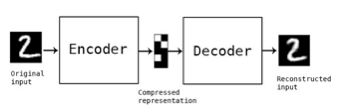

# Goal?

<div class="alert alert-block alert-info">
<font color=black><br>

- Denoising or noise reduction is the process of removing noise from a signal. 
- This can be an image, audio or a document. 

<br></font>
</div>

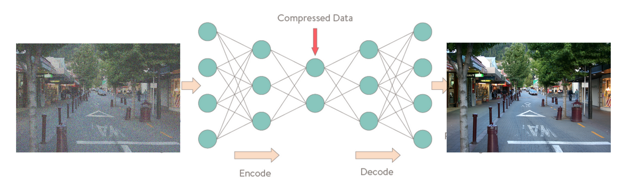

# Import modules

In [25]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing import image
from IPython.display import Image
import matplotlib.pyplot as plt

# Import dataset

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll used the MNIST dataset.
- We are going do add some random noise in order to test the autoencoder.

<br></font>
</div>

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

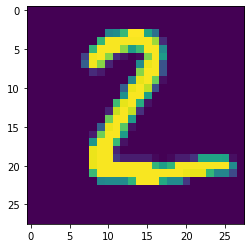

In [15]:
# Print original picture
plt.imshow(x_test[1].reshape(28, 28));

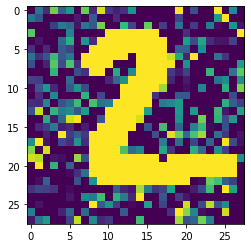

In [13]:
# Adding some noise to test the autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.imshow(x_test_noisy[1].reshape(28, 28));

# Building an autoencoder

<div class="alert alert-block alert-info">
<font color=black><br>

- First, we define the input layer and the dimensions of the input data. MNIST dataset has images that are reshaped to be 28 X 28 in dimensions. Since the images are greyscaled, the colour channel of the image will be 1 so the shape is (28, 28, 1).

- The second layer is the convolution layer, this layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 32 is the number of output filters in the convolution and (3, 3) is the kernel size.

- After each convolution layer, we use **MaxPooling** function to reduce the dimensions. The (28, 28, 32) is reduced by a factor of two so it will be (14, 14, 32) after the first MaxPooling then (7, 7, 32) after the second MaxPooling. This is the encoded representation of the image.

<br></font>
</div>

In [23]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

<div class="alert alert-block alert-info">
<font color=black><br>

- The code below is the reconstruction part of the original digits. 
- This is where the network actually learns how to remove the noise from the input images. 
- We use UpSampling function to rebuild the images to the original dimensions (28, 28)

<br></font>
</div>

In [26]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

<div class="alert alert-block alert-info">
<font color=black><br>

- Let's crete the model, compile and train.
- CCNs are expensive to run. 
- I have run this code on my MacBookPro where only CPUs are available.
- Running time is expected to be aorund 15 minutes.

<br></font>
</div>

In [27]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs = 50,
                batch_size = 256,
                validation_data = (x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 75s 271ms/step - loss: 3.3732 - val_loss: 2.0772
Epoch 2/50
235/235 [==============================] - 64s 272ms/step - loss: -21.4364 - val_loss: -502.0714
Epoch 3/50
235/235 [==============================] - 64s 272ms/step - loss: -495.0517 - val_loss: -502.2458
Epoch 4/50
235/235 [==============================] - 63s 268ms/step - loss: -495.6576 - val_loss: -502.3576
Epoch 5/50
235/235 [==============================] - 63s 267ms/step - loss: -496.1409 - val_loss: -502.4569
Epoch 6/50
235/235 [==============================] - 66s 280ms/step - loss: -495.6044 - val_loss: -502.5417
Epoch 7/50
235/235 [==============================] - 64s 274ms/step - loss: -496.4528 - val_loss: -502.6133
Epoch 8/50
235/235 [==============================] - 64s 273ms/step - loss: -495.7769 - val_loss: -502.6757
Epoch 9/50
235/235 [==============================] - 67s 284ms/step - loss: -495.0979 - val_loss: -502.7328
Epoch 10/50
235/235 [=====

In [29]:
dir(autoencoder)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_cluster_coordinator',
 '_compile_wa

In [32]:
autoencoder.losses

[]

# Inference

<div class="alert alert-block alert-warning">
<font color=black><br>

- Now that the autoencoder is trained we'll try out on a coupled of samples.

<br></font>
</div>

In [44]:
denoised_data = autoencoder.predict(x_test_noisy)
#dist = np.linalg.norm(inputs - target_data, axis=-1)
#print(dist)

In [45]:
denoised_data[0].shape

(28, 28, 1)

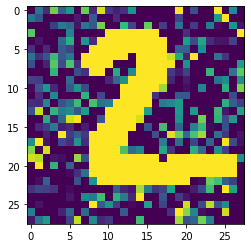

In [50]:
# The shape with noise
plt.imshow(x_test_noisy[1].reshape(28, 28));

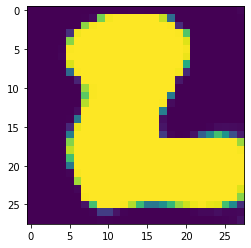

In [51]:
# The reconstruct shape withouht noise
plt.imshow(denoised_data[1].reshape(28, 28));
#plt.imshow(denoised_data)

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726
- https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d 
- http://www.deeplearningbook.org/contents/autoencoders.html 
- https://blog.keras.io/building-autoencoders-in-keras.html

</font>
</div>